In [3]:
#import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]

%matplotlib inline
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [4]:
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../datasets/bank_marketing/bank-full.csv", delimiter=";")
# bank = pd.read_csv("bank-full.csv", delimiter = ";")
# print first 10 examples
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

## Histogram

### Pros
1. Is acts outstanding in large datasets, this is by using the grouping (bins) as intervals.
2. We can extract patterns and trends in data, symmetry, skewness and peaks can be detected easily.
3. Outliers are shown according to the isolated bars showing in a histogram chart.
4. Distribution of data can be inspired by viewing the data shape.
5. Quickly get insightful understanding of data.

### Cons

1. **_Data is categorized into groups, so precise value extraction is ino possible:_** Histogram is highly dependent to number of bins, in Cons 1 chart, with small and large bins, for the bank load duration with a low bin (5) it is not simple to understand max occurrence of a same duration value extraction. in the right side we can not determine if the value is 0 or 1000.

Text(0.5, 1.0, 'Cons 1: Small bins')

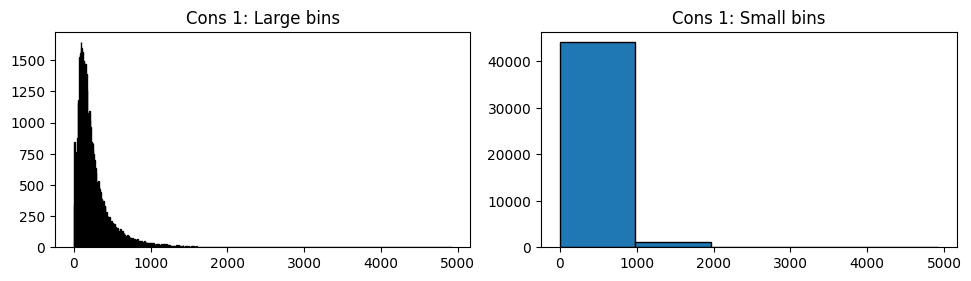

In [6]:
data = bank.duration
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
fig.tight_layout(pad=2.0)
axs[0].hist(data, edgecolor="black", bins=500)
axs[0].set_title("Cons 1: Large bins")
axs[1].hist(data, edgecolor="black", bins=5)
axs[1].set_title("Cons 1: Small bins")

2. **_It should be used for continuous data only:_** Using histogram for binary data or any data that is not continuous, will not get a good result to distinguish meaningful data. the data is grouped into ranges or intervals, the original data is lost and can price an exact value.

Text(0.5, 1.0, 'Cons 2: Continuous Data')

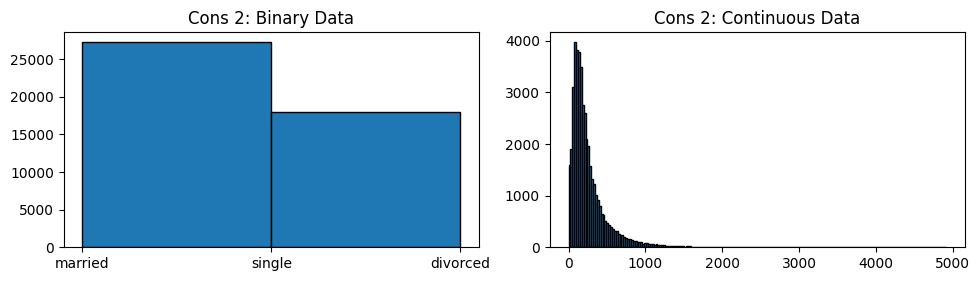

In [7]:
data = bank.marital
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
fig.tight_layout(pad=2.0)
axs[0].hist(bank.marital, edgecolor="black", bins=2)
axs[0].set_title("Cons 2: Binary Data")
axs[1].hist(bank.duration, edgecolor="black", bins=200)
axs[1].set_title("Cons 2: Continuous Data")

3. **_Maximum and Minimum can change the look of graph drastically:_** In the cons 3, changing the maximum included data makes the chart to be misleading, it is visible in the left and right chart that the distribution can not be detected correctly

Text(0.5, 1.0, 'Cons 3: no max filtering')

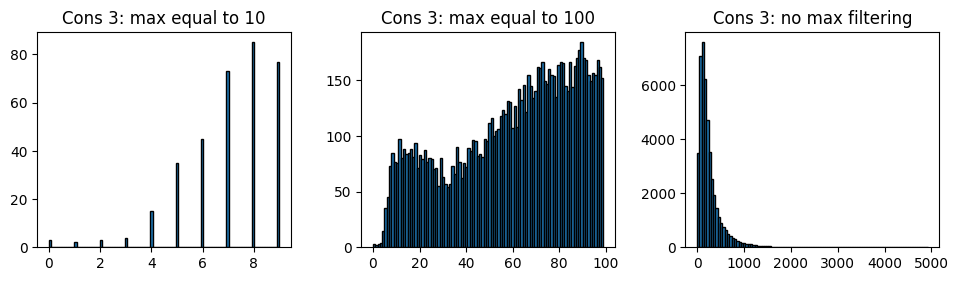

In [8]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(10, 3)
fig.tight_layout(pad=2.0)
axs[0].hist(bank[bank.duration <10].duration, edgecolor="black", bins=100)
axs[0].set_title("Cons 3: max equal to 10")
axs[1].hist(bank[bank.duration <100].duration, edgecolor="black", bins=100)
axs[1].set_title("Cons 3: max equal to 100")
axs[2].hist(bank.duration, edgecolor="black", bins=100)
axs[2].set_title("Cons 3: no max filtering")

4. **_Comparing two different datasets is not possible:_** We can not gather useful information when we compare two different datasets to compare features using histogram, instead we can use bar charts.
5. Detection of continuos and discrete variables is not possible.
6. Detection of distribution type is possible but it is so difficult.
7. All af the data should be in memory, so it is a high-end hardware for large dataset.